<a href="https://colab.research.google.com/github/tuhinbiswas24/Diabetes-Prediction/blob/main/DIABETES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES PREDICTION ANALYSIS

### Step 1 Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### Step 2 Loading the dataset

In [ ]:
df = pd.read_csv('diabetes.csv')

### Step 3 Exploring the Data

#### 3.1) Understanding all the variables of dataset

In [ ]:
# Displaying First Five records of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Displaying Last Five records of the Dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Displaying random five records from the dataset
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
19,1,115,70,30,96,34.6,0.529,32,1
464,10,115,98,0,0,24.0,1.022,34,0
702,1,168,88,29,0,35.0,0.905,52,1
90,1,80,55,0,0,19.1,0.258,21,0
499,6,154,74,32,193,29.3,0.839,39,0


In [ ]:
# Finding the shape of the dataset
df.shape

(768, 9)

In [ ]:
# Finding the types of coloumns in the dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# finding if the dataset contain any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Complete Summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


###### Observation -
Here from the above table we can that the minimum values of the coloumns - "BloodPressure", "SkinThinkness". "Insulin" & "BMI" is zero(0). So it's clear that these values can't be zero so we need to perform the next step of Data Cleaning

#### 3.2) Data Cleaning

In [ ]:
# Checking the shape of dataset before dropping the duplicates
df.shape

(768, 9)

In [ ]:
# Droping the Dulpicates
df=df.drop_duplicates()

In [ ]:
# Checking the shape of dataset after dropping the dulicates
df.shape

(768, 9)

As there is no change in the shape of the dataset it's clear that there are no duplicates in the dataset we are using

In [ ]:
# Checking for the NULL Values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

So there are no NULL values / Missing values in the Dataset

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Checking for the Zero values in the dataset

print('No. of zero values in the Glucose ', df[df['Glucose']==0].shape[0])
print('No. of zero values in the BloodPressure ', df[df['BloodPressure']==0].shape[0])
print('No. of zero values in the SkinThickness ', df[df['SkinThickness']==0].shape[0])
print('No. of zero values in the Insulin ', df[df['Insulin']==0].shape[0])
print('No. of zero values in the BMI ', df[df['BMI']==0].shape[0])

No. of zero values in the Glucose  5
No. of zero values in the BloodPressure  35
No. of zero values in the SkinThickness  227
No. of zero values in the Insulin  374
No. of zero values in the BMI  11


In [ ]:
# Replacing all the zero values with the mean of that columns

df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of zero values in the Glucose ', df[df['Glucose']==0].shape[0])

df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
print('No. of zero values in the BloodPressure ', df[df['BloodPressure']==0].shape[0])

df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
print('No. of zero values in the SkinThickness ', df[df['SkinThickness']==0].shape[0])

df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())
print('No. of zero values in the Insulin ', df[df['Insulin']==0].shape[0])

df['BMI']= df['BMI'].replace(0,df['BMI'].mean())
print('No. of zero values in the BMI ', df[df['BMI']==0].shape[0])

No. of zero values in the Glucose  0
No. of zero values in the BloodPressure  0
No. of zero values in the SkinThickness  0
No. of zero values in the Insulin  0
No. of zero values in the BMI  0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Step 4 Data Visualisation

#### 4.1) Histogram Plot

<function matplotlib.pyplot.show(close=None, block=None)>

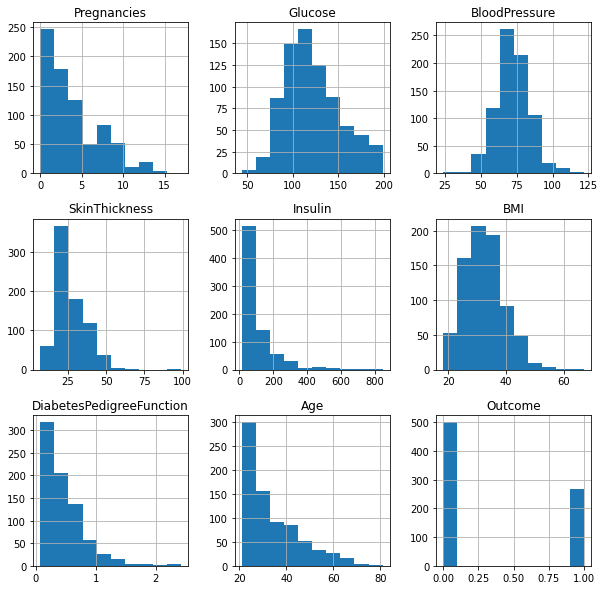

In [ ]:
df.hist(bins=10,figsize=(10,10))
plt.show

#### 4.2) Scatter Plot

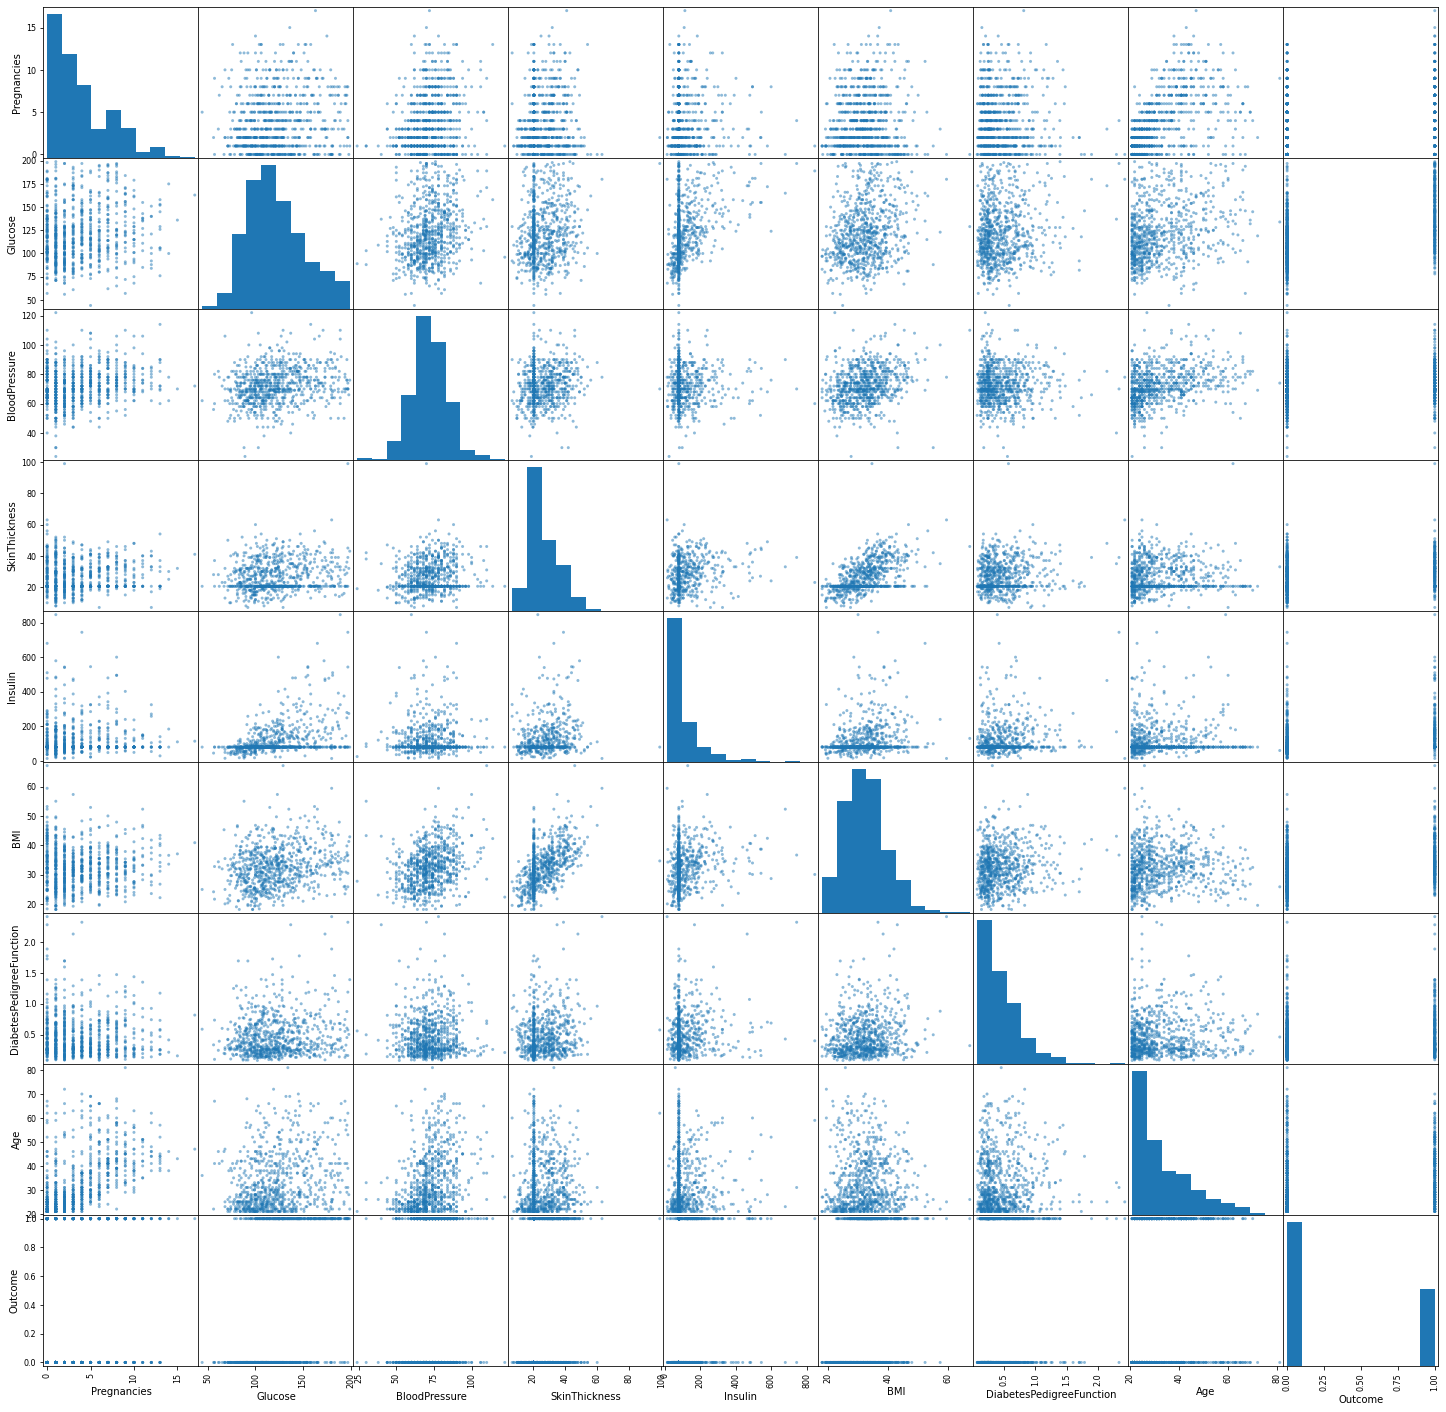

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (25,25));

#### 4.3) Pair Plot

<function matplotlib.pyplot.show(close=None, block=None)>

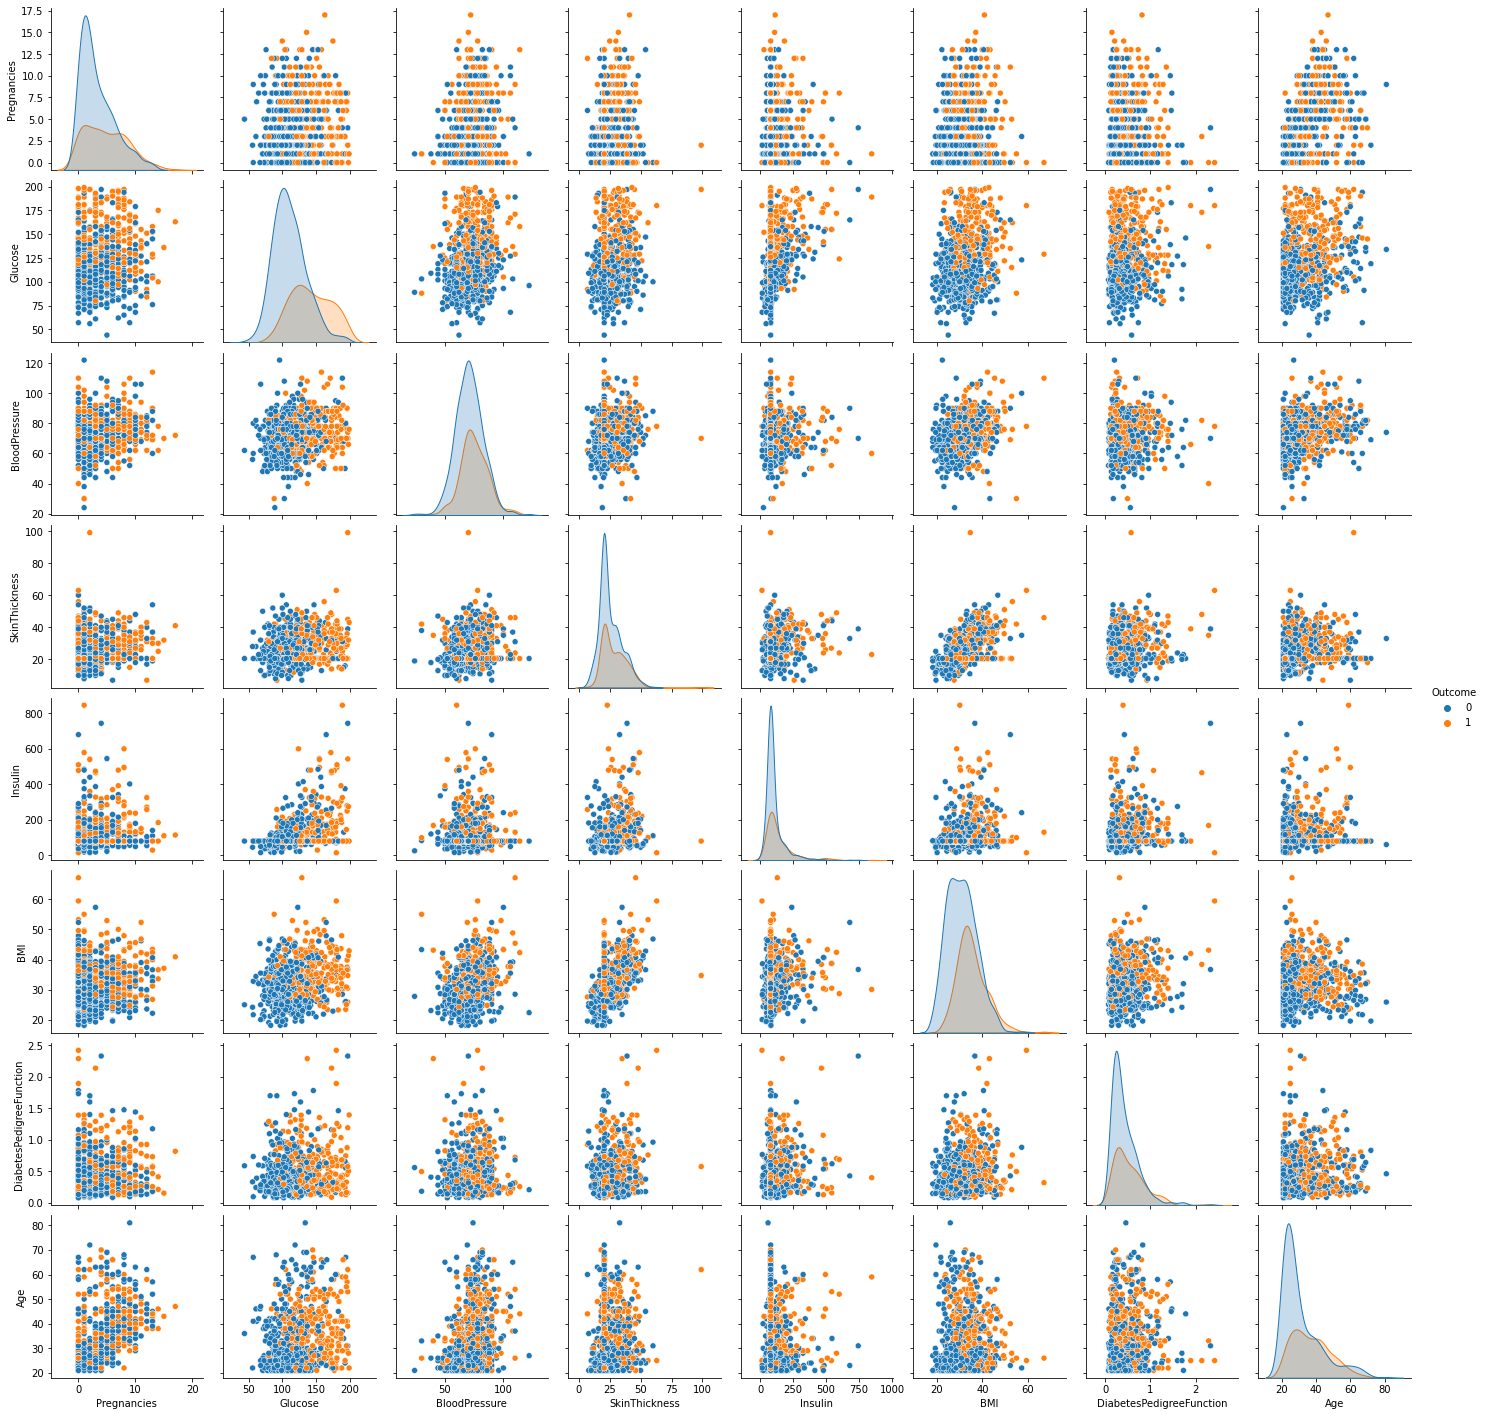

In [ ]:
sns.pairplot(data= df, hue = 'Outcome')
plt.show

#### 4.4) Correlational Analysis with Heat Map

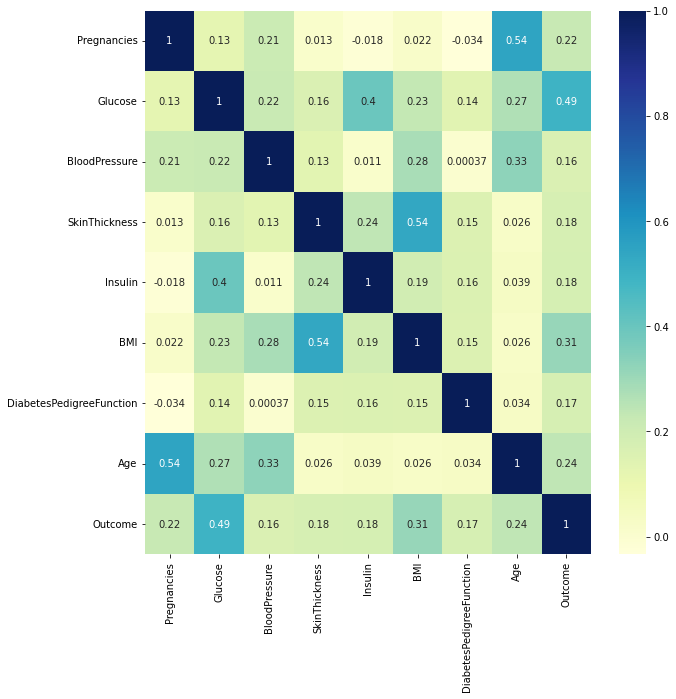

In [ ]:
# Correlational Feature for the dataset
corrmat =df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# Drawing the heat map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="YlGnBu")

##### Observation

From the correlation Heatmap, we can see that there is high correlation between Outcome and Pregnancies, Glucose, BMI, Age, Insulin. We can use these features as an input from the use to predict the output

### Step 5 Spliting the dataframes into X and y

In [ ]:
target_name = 'Outcome'

# taking seperate object for target feature
y = df[target_name]

# taking seperate object for input features
X =  df.drop(target_name, axis=1)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Step 6 Applying Feature Scaling

In [ ]:
# There are 4 kind of feature scaling - Standard, Normalizer, Minmaz Scaler, Binarizer
# Here we are applying Standard Scaler Technique

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)


### Step 7 Spliting the data set into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [ ]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [ ]:
X_test.shape, y_test.shape

((154, 8), (154,))

### Step 8 Building the Classification Algorithms and doing Predictions

#### Step 8.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [ ]:
lr_pred=lr.predict(X_test)

#### Step 8.2 KNeighbors Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred=knn.predict(X_test)

#### Step 8.3 Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_pred=nb.predict(X_test)

#### Step 8.4 Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

SVC()

In [ ]:
sv_pred=sv.predict(X_test)

#### Step 8.5 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred=dt.predict(X_test)

#### Step 8.6 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
rf_pred=rf.predict(X_test)

### Step 9 Model Evaluation

####  9.1) Train and Test Score for each of the algorithms

In [ ]:
# Train Score and Test Score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression ", lr.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Regression ", lr.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Regression ", accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression  77.36156351791531
Accuracy(Test) score of Logistic Regression  77.27272727272727
Accuracy(Test) score of Logistic Regression  77.27272727272727


In [ ]:
# Train Score and Test Score of KNN
print("Train Accuracy of Logistic KNN ",knn.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic KNN ", knn.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic KNN ", accuracy_score(y_test, knn_pred)*100)

Train Accuracy of Logistic KNN  81.10749185667753
Accuracy(Test) score of Logistic KNN  74.67532467532467
Accuracy(Test) score of Logistic KNN  74.67532467532467


In [ ]:
# Train Score and Test Score of Naive-Bayes
print("Train Accuracy of Logistic Naive-Bayes ",nb.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Naive-Bayes ", nb.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Naive-Bayes ", accuracy_score(y_test, nb_pred)*100)

Train Accuracy of Logistic Naive-Bayes  74.2671009771987
Accuracy(Test) score of Logistic Naive-Bayes  74.02597402597402
Accuracy(Test) score of Logistic Naive-Bayes  74.02597402597402


In [ ]:
# Train Score and Test Score of SVM
print("Train Accuracy of Logistic SVM ",sv.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic SVM ", sv.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic SVM ", accuracy_score(y_test, sv_pred)*100)

Train Accuracy of Logistic SVM  81.92182410423453
Accuracy(Test) score of Logistic SVM  83.11688311688312
Accuracy(Test) score of Logistic SVM  83.11688311688312


In [ ]:
# Train Score and Test Score of Decision Tree
print("Train Accuracy of Logistic Decision Tree ",dt.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Decision Tree ", dt.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Decision Tree ", accuracy_score(y_test, dt_pred)*100)

Train Accuracy of Logistic Decision Tree  100.0
Accuracy(Test) score of Logistic Decision Tree  77.92207792207793
Accuracy(Test) score of Logistic Decision Tree  77.92207792207793


In [ ]:
# Train Score and Test Score of Random Forest
print("Train Accuracy of Logistic Random Forest ",rf.score(X_train,y_train)*100)
print("Accuracy(Test) score of Logistic Random Forest ", rf.score(X_test,y_test)*100)
print("Accuracy(Test) score of Logistic Random Forest ", accuracy_score(y_test, rf_pred)*100)

Train Accuracy of Logistic Random Forest  99.8371335504886
Accuracy(Test) score of Logistic Random Forest  77.92207792207793
Accuracy(Test) score of Logistic Random Forest  77.92207792207793
